In [5]:
from cps_data_agg import (process_cps_data)
file_path = r'C:\Users\Biswajit Palit\Downloads\cps_00006.csv.gz'
data = process_cps_data(file_path)

data

,STATEFIP,YEAR,Residuals,STATEFIP_2,STATEFIP_4,STATEFIP_5,STATEFIP_6,STATEFIP_8,STATEFIP_9,STATEFIP_10,...,YEAR_1991,YEAR_1992,YEAR_1993,YEAR_1994,YEAR_1995,YEAR_1996,YEAR_1997,YEAR_1998,YEAR_1999,YEAR_2000
0,1,1980,-0.782133,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1981,-0.472124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1982,-0.589845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1983,-0.519442,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1984,-0.429119,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,56,1996,0.013756,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1046,56,1997,-0.012077,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1047,56,1998,0.066763,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048,56,1999,0.122135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from cps_data_prep import (cps_data)

df = cps_data(file_path)

X = df[['High School', "Master's Degree", 'Up to Grade 10', 'AGE']]
y = df['INCWAGE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Obtain predicted values from the fitted model
y_pred = model.predict(X)

residuals = y - y_pred

df['Residuals'] = residuals

residuals_mean_by_state_year = df.groupby(['STATEFIP', 'YEAR'])['Residuals'].mean().reset_index()

residuals_mean_by_state_year 

dummy_df = pd.get_dummies(residuals_mean_by_state_year['STATEFIP'], prefix='STATEFIP', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
residuals_mean_by_state_year1 = pd.concat([residuals_mean_by_state_year, dummy_df], axis=1)

dummy_df2 = pd.get_dummies(residuals_mean_by_state_year1['YEAR'], prefix='YEAR', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
residuals_mean_by_state_year1 = pd.concat([residuals_mean_by_state_year1, dummy_df2], axis=1)

boolean_columns = [ 'STATEFIP_2',
    'STATEFIP_4', 'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9',
    'STATEFIP_10', 'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15',
    'STATEFIP_16', 'STATEFIP_17', 'STATEFIP_18', 'STATEFIP_19',
    'STATEFIP_20', 'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23',
    'STATEFIP_24', 'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27',
    'STATEFIP_28', 'STATEFIP_29', 'STATEFIP_30', 'STATEFIP_31',
    'STATEFIP_32', 'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35',
    'STATEFIP_36', 'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39',
    'STATEFIP_40', 'STATEFIP_41', 'STATEFIP_42', 'STATEFIP_44',
    'STATEFIP_45', 'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48',
    'STATEFIP_49', 'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53',
    'STATEFIP_54', 'STATEFIP_55', 'STATEFIP_56', 'YEAR_1981', 'YEAR_1982',
    'YEAR_1983', 'YEAR_1984', 'YEAR_1985', 'YEAR_1986', 'YEAR_1987',
    'YEAR_1988', 'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992',
    'YEAR_1993', 'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997',
    'YEAR_1998', 'YEAR_1999', 'YEAR_2000']

# Convert True and False to 1 and 0 in the specified columns
residuals_mean_by_state_year1[boolean_columns] = residuals_mean_by_state_year1[boolean_columns].astype(int)

residuals_mean_by_state_year1


,STATEFIP,YEAR,Residuals,STATEFIP_2,STATEFIP_4,STATEFIP_5,STATEFIP_6,STATEFIP_8,STATEFIP_9,STATEFIP_10,...,YEAR_1991,YEAR_1992,YEAR_1993,YEAR_1994,YEAR_1995,YEAR_1996,YEAR_1997,YEAR_1998,YEAR_1999,YEAR_2000
0,1,1980,-0.782111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1981,-0.472092,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1982,-0.589845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1983,-0.519423,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1984,-0.429117,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,56,1996,0.013699,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1046,56,1997,-0.019762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1047,56,1998,0.061241,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048,56,1999,0.110283,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


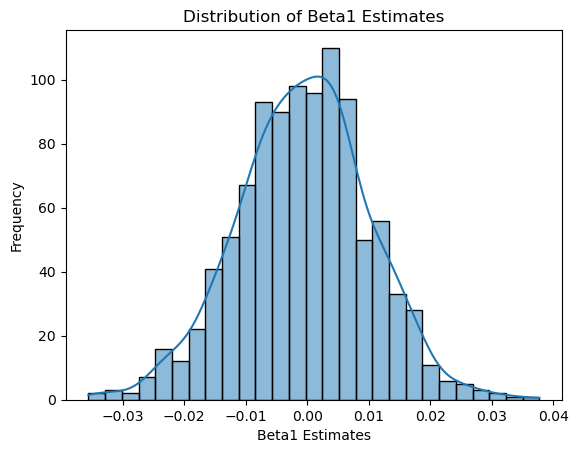

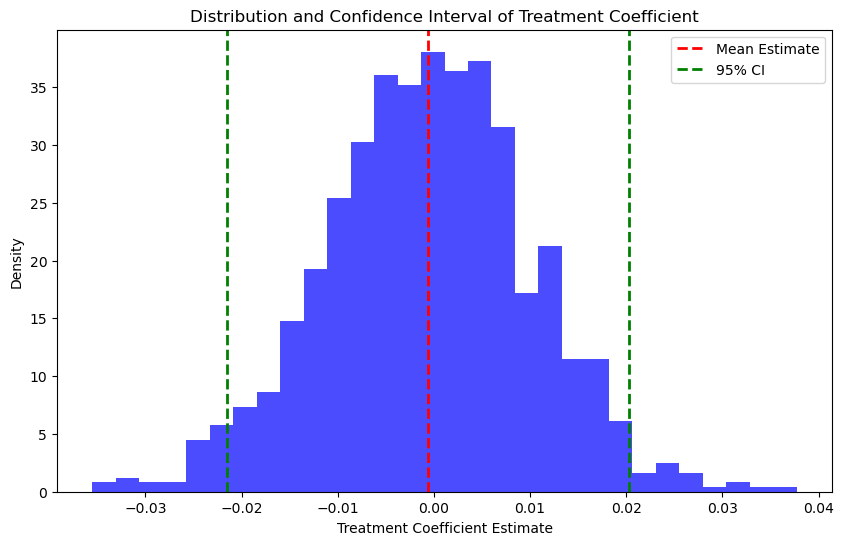

Number of times null hypothesis is rejected: 53 out of 1000 simulations
Type 1 Error: 0.053
Bias for Coefficient of Treatment (True Value = 0): -0.0005906905499230135
Average MSE for Coefficient of Treatment (True Value = 0): 0.00011409954780934142
Average Standard Error for Coefficient of Treatment: 0.010434344104124485
Standard Error of the Distribution of Beta: 0.010665394155096803


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from cps_data_agg import (process_cps_data)
import scipy.stats as stats

np.random.seed(42)

file_path = r'C:\Users\Biswajit Palit\Downloads\cps_00006.csv.gz'
beta1_estimates = []
reject_count = 0  # Counter for the number of rejections
alpha = 0.05  # Significance level
num_simulations = 1000
num_individuals = 20
bias_values = []
squared_error_values = []
standard_error_values = []  # List to store standard errors

true_beta1_value = 0

for _ in range(num_simulations):
    data = residuals_mean_by_state_year1
    states = data['STATEFIP'].unique()

    treatment_states = np.random.choice(states, size=len(states)//2, replace=False)

    # Assign treatment year to each treatment state, staggered between 1985 and 1995
    treatment_years = np.random.choice(range(1985, 1996), size=len(treatment_states), replace=True)
    state_to_treatment_year = dict(zip(treatment_states, treatment_years))

    # Add a treatment column to the DataFrame
    data['TREATMENT'] = data.apply(lambda x: 1 if x['STATEFIP'] in treatment_states and x['YEAR'] >= state_to_treatment_year[x['STATEFIP']] else 0, axis=1)

    X = data[[ 'STATEFIP_2',
       'STATEFIP_4', 'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9',
       'STATEFIP_10', 'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15',
       'STATEFIP_16', 'STATEFIP_17', 'STATEFIP_18', 'STATEFIP_19',
       'STATEFIP_20', 'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23',
       'STATEFIP_24', 'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27',
       'STATEFIP_28', 'STATEFIP_29', 'STATEFIP_30', 'STATEFIP_31',
       'STATEFIP_32', 'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35',
       'STATEFIP_36', 'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39',
       'STATEFIP_40', 'STATEFIP_41', 'STATEFIP_42', 'STATEFIP_44',
       'STATEFIP_45', 'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48',
       'STATEFIP_49', 'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53',
       'STATEFIP_54', 'STATEFIP_55', 'STATEFIP_56',  'YEAR_1981', 'YEAR_1982',
       'YEAR_1983', 'YEAR_1984', 'YEAR_1985', 'YEAR_1986', 'YEAR_1987',
       'YEAR_1988', 'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992',
       'YEAR_1993', 'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997',
       'YEAR_1998', 'YEAR_1999', 'YEAR_2000']] # plus any other control variables
    X = sm.add_constant(X)
    Y = data['Residuals'] # Replace 'outcome' with your dependent variable
    
    model = sm.OLS(Y, X).fit()

    y_pred = model.predict(X)

    residuals = Y - y_pred

    data['Residuals'] = residuals

    a = state_to_treatment_year.keys()

    filtered_df = data[data['STATEFIP'].isin(a)]
    

    # Separate pre-treatment and post-treatment data
    pre_treatment_df = filtered_df[filtered_df['TREATMENT'] == 0]
    post_treatment_df = filtered_df[filtered_df['TREATMENT'] == 1]

    # Calculate the average residuals for pre-treatment and post-treatment periods
    avg_residuals_pre_treatment = pre_treatment_df.groupby('STATEFIP')['Residuals'].mean().reset_index()
    avg_residuals_post_treatment = post_treatment_df.groupby('STATEFIP')['Residuals'].mean().reset_index()

    # Add a 'Treatment' column to indicate the treatment status for each period
    avg_residuals_pre_treatment['Treatment'] = 0
    avg_residuals_post_treatment['Treatment'] = 1

    # Combine the two DataFrames into a new DataFrame
    two_period_panel_df = pd.concat([avg_residuals_pre_treatment, avg_residuals_post_treatment], ignore_index=True)
    
    # Define the dependent and independent variables
    
    y = two_period_panel_df['Residuals']
    X = two_period_panel_df[['Treatment']]
    
    # Add a constant term (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    # Extract the standard error of the 'Treatment' coefficient
    standard_error = model.bse['Treatment']
    standard_error_values.append(standard_error)

    bias = model.params['Treatment'] - true_beta1_value
    bias_values.append(bias)

    squared_error = (model.params['Treatment'] - true_beta1_value) ** 2
    squared_error_values.append(squared_error)

    # Check if null hypothesis for beta1 is rejected
    if model.pvalues['Treatment'] < alpha:
        reject_count += 1

    # Store the beta estimate
    beta1_estimates.append(model.params['Treatment'])

type1_error = reject_count / num_simulations
average_bias = np.mean(bias_values)
average_mse = np.mean(squared_error_values)
average_standard_error = np.mean(standard_error_values)

# Calculate the standard error of the distribution of beta
std_error_beta_distribution = np.std(beta1_estimates)

sns.histplot(beta1_estimates, kde=True)
plt.xlabel('Beta1 Estimates')
plt.ylabel('Frequency')
plt.title('Distribution of Beta1 Estimates')
plt.show()

# Calculate the confidence interval
confidence_interval = (
    np.mean(beta1_estimates) - 1.96 * std_error_beta_distribution,
    np.mean(beta1_estimates) + 1.96 * std_error_beta_distribution
)

# Plot the confidence interval
plt.figure(figsize=(10, 6))
plt.hist(beta1_estimates, bins=30, density=True, color='blue', alpha=0.7)
plt.axvline(np.mean(beta1_estimates), color='red', linestyle='dashed', linewidth=2, label='Mean Estimate')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Treatment Coefficient Estimate')
plt.ylabel('Density')
plt.title('Distribution and Confidence Interval of Treatment Coefficient')
plt.legend()
plt.show()

# Print the results
print(f"Number of times null hypothesis is rejected: {reject_count} out of {num_simulations} simulations")
print(f"Type 1 Error: {type1_error}")
print(f"Bias for Coefficient of Treatment (True Value = {true_beta1_value}): {average_bias}")
print(f"Average MSE for Coefficient of Treatment (True Value = {true_beta1_value}): {average_mse}")
print(f"Average Standard Error for Coefficient of Treatment: {average_standard_error}")
print(f"Standard Error of the Distribution of Beta: {std_error_beta_distribution}")


c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


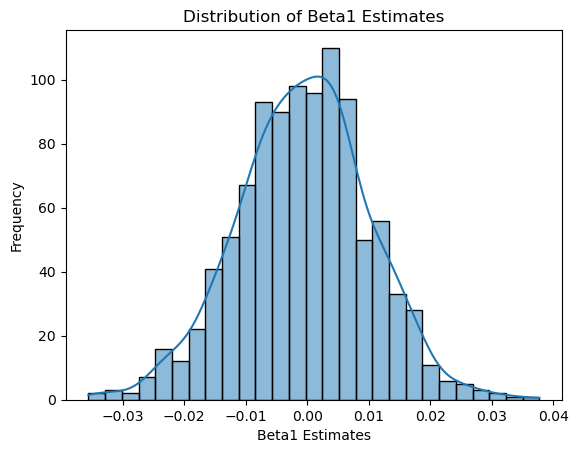

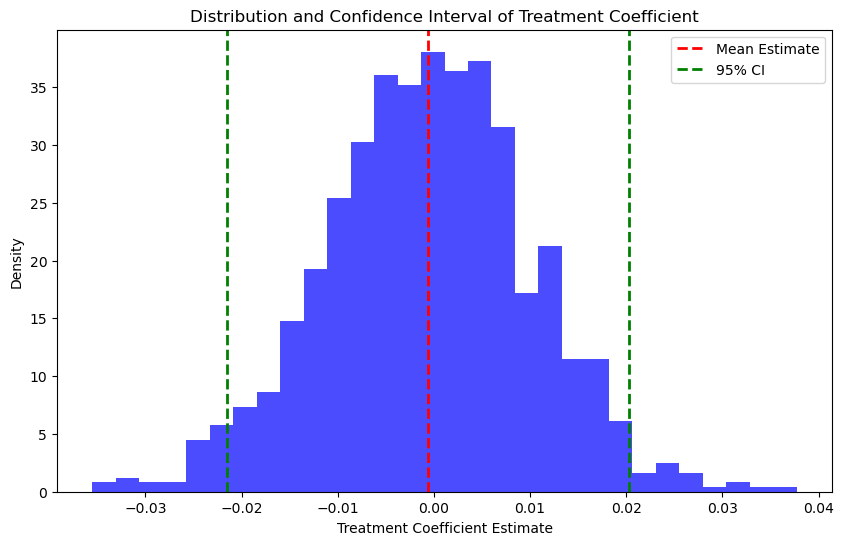

Number of times null hypothesis is rejected: 53 out of 1000 simulations
Type 1 Error: 0.053
Bias for Coefficient of Treatment (True Value = 0): -0.0005906905499230135
Average MSE for Coefficient of Treatment (True Value = 0): 0.00011409954780934142
Average Standard Error for Coefficient of Treatment: 0.010434344104124485
Standard Error of the Distribution of Beta: 0.010665394155096803


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from cps_data_agg import (process_cps_data)
import scipy.stats as stats

np.random.seed(42)

file_path = r'C:\Users\Biswajit Palit\Downloads\cps_00006.csv.gz'
beta1_estimates = []
reject_count = 0  # Counter for the number of rejections
alpha = 0.05  # Significance level
num_simulations = 1000
num_individuals = 20
bias_values = []
squared_error_values = []
standard_error_values = []  # List to store standard errors

true_beta1_value = 0

for _ in range(num_simulations):
    data = residuals_mean_by_state_year1
    states = data['STATEFIP'].unique()

    treatment_states = np.random.choice(states, size=len(states)//2, replace=False)

    # Assign treatment year to each treatment state, staggered between 1985 and 1995
    treatment_years = np.random.choice(range(1985, 1996), size=len(treatment_states), replace=True)
    state_to_treatment_year = dict(zip(treatment_states, treatment_years))

    # Add a treatment column to the DataFrame
    data['TREATMENT'] = data.apply(lambda x: 1 if x['STATEFIP'] in treatment_states and x['YEAR'] >= state_to_treatment_year[x['STATEFIP']] else 0, axis=1)

    X = data[[ 'STATEFIP_2',
       'STATEFIP_4', 'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9',
       'STATEFIP_10', 'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15',
       'STATEFIP_16', 'STATEFIP_17', 'STATEFIP_18', 'STATEFIP_19',
       'STATEFIP_20', 'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23',
       'STATEFIP_24', 'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27',
       'STATEFIP_28', 'STATEFIP_29', 'STATEFIP_30', 'STATEFIP_31',
       'STATEFIP_32', 'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35',
       'STATEFIP_36', 'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39',
       'STATEFIP_40', 'STATEFIP_41', 'STATEFIP_42', 'STATEFIP_44',
       'STATEFIP_45', 'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48',
       'STATEFIP_49', 'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53',
       'STATEFIP_54', 'STATEFIP_55', 'STATEFIP_56',  'YEAR_1981', 'YEAR_1982',
       'YEAR_1983', 'YEAR_1984', 'YEAR_1985', 'YEAR_1986', 'YEAR_1987',
       'YEAR_1988', 'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992',
       'YEAR_1993', 'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997',
       'YEAR_1998', 'YEAR_1999', 'YEAR_2000']] # plus any other control variables
    X = sm.add_constant(X)
    Y = data['Residuals'] # Replace 'outcome' with your dependent variable
    
    model = sm.OLS(Y, X).fit()

    y_pred = model.predict(X)

    residuals = Y - y_pred

    data['Residuals'] = residuals

    a = state_to_treatment_year.keys()

    filtered_df = data[data['STATEFIP'].isin(a)]
    

    # Separate pre-treatment and post-treatment data
    pre_treatment_df = filtered_df[filtered_df['TREATMENT'] == 0]
    post_treatment_df = filtered_df[filtered_df['TREATMENT'] == 1]

    # Calculate the average residuals for pre-treatment and post-treatment periods
    avg_residuals_pre_treatment = pre_treatment_df.groupby('STATEFIP')['Residuals'].mean().reset_index()
    avg_residuals_post_treatment = post_treatment_df.groupby('STATEFIP')['Residuals'].mean().reset_index()

    # Add a 'Treatment' column to indicate the treatment status for each period
    avg_residuals_pre_treatment['Treatment'] = 0
    avg_residuals_post_treatment['Treatment'] = 1

    # Combine the two DataFrames into a new DataFrame
    two_period_panel_df = pd.concat([avg_residuals_pre_treatment, avg_residuals_post_treatment], ignore_index=True)
    
    # Define the dependent and independent variables
    
    y = two_period_panel_df['Residuals']
    X = two_period_panel_df[['Treatment']]
    
    # Add a constant term (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    # Extract the standard error of the 'Treatment' coefficient
    standard_error = model.bse['Treatment']
    standard_error_values.append(standard_error)

    bias = model.params['Treatment'] - true_beta1_value
    bias_values.append(bias)

    squared_error = (model.params['Treatment'] - true_beta1_value) ** 2
    squared_error_values.append(squared_error)

    # Check if null hypothesis for beta1 is rejected
    if model.pvalues['Treatment'] < alpha:
        reject_count += 1

    # Store the beta estimate
    beta1_estimates.append(model.params['Treatment'])

type1_error = reject_count / num_simulations
average_bias = np.mean(bias_values)
average_mse = np.mean(squared_error_values)
average_standard_error = np.mean(standard_error_values)

# Calculate the standard error of the distribution of beta
std_error_beta_distribution = np.std(beta1_estimates)

sns.histplot(beta1_estimates, kde=True)
plt.xlabel('Beta1 Estimates')
plt.ylabel('Frequency')
plt.title('Distribution of Beta1 Estimates')
plt.show()

# Calculate the confidence interval
confidence_interval = (
    np.mean(beta1_estimates) - 1.96 * std_error_beta_distribution,
    np.mean(beta1_estimates) + 1.96 * std_error_beta_distribution
)

# Plot the confidence interval
plt.figure(figsize=(10, 6))
plt.hist(beta1_estimates, bins=30, density=True, color='blue', alpha=0.7)
plt.axvline(np.mean(beta1_estimates), color='red', linestyle='dashed', linewidth=2, label='Mean Estimate')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Treatment Coefficient Estimate')
plt.ylabel('Density')
plt.title('Distribution and Confidence Interval of Treatment Coefficient')
plt.legend()
plt.show()

# Print the results
print(f"Number of times null hypothesis is rejected: {reject_count} out of {num_simulations} simulations")
print(f"Type 1 Error: {type1_error}")
print(f"Bias for Coefficient of Treatment (True Value = {true_beta1_value}): {average_bias}")
print(f"Average MSE for Coefficient of Treatment (True Value = {true_beta1_value}): {average_mse}")
print(f"Average Standard Error for Coefficient of Treatment: {average_standard_error}")
print(f"Standard Error of the Distribution of Beta: {std_error_beta_distribution}")


In [23]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from cps_data_agg import (process_cps_data)
import scipy.stats as stats




np.random.seed(42)


def beta_Ztest_twosided(alpha, sigma, mu_0, mu):
    # (1-alpha/2)-quantile of N(0,1):
    z_upper = stats.norm.ppf(1 - alpha)
    
    # location shift under H_1:
    location_shift = (mu - mu_0) / sigma
    
    # compute power
    power = 1 - stats.norm.cdf(z_upper - location_shift)
    
    return power

file_path = r'C:\Users\Biswajit Palit\Downloads\cps_00006.csv.gz'
beta1_estimates = []
reject_count = 0  # Counter for the number of rejections
alpha = 0.05  # Significance level
num_simulations = 1000
num_individuals = 20
bias_values = []
squared_error_values = []
standard_error_values = []  # List to store standard errors
power_values = []
true_beta1_value = 0
mu = 0.02
reject_count_2 = 0

for _ in range(num_simulations):
    data = residuals_mean_by_state_year1
    states = data['STATEFIP'].unique()

    treatment_states = np.random.choice(states, size=len(states)//2, replace=False)

    # Assign treatment year to each treatment state, staggered between 1985 and 1995
    treatment_years = np.random.choice(range(1985, 1996), size=len(treatment_states), replace=True)
    state_to_treatment_year = dict(zip(treatment_states, treatment_years))

    # Add a treatment column to the DataFrame
    data['TREATMENT'] = data.apply(lambda x: 1 if x['STATEFIP'] in treatment_states and x['YEAR'] >= state_to_treatment_year[x['STATEFIP']] else 0, axis=1)
    data['outcome'] = data.apply(lambda x: x['Residuals']*(1.02) if x['TREATMENT'] == 1 else x['Residuals'], axis=1)


    X = data[[ 'STATEFIP_2',
       'STATEFIP_4', 'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9',
       'STATEFIP_10', 'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15',
       'STATEFIP_16', 'STATEFIP_17', 'STATEFIP_18', 'STATEFIP_19',
       'STATEFIP_20', 'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23',
       'STATEFIP_24', 'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27',
       'STATEFIP_28', 'STATEFIP_29', 'STATEFIP_30', 'STATEFIP_31',
       'STATEFIP_32', 'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35',
       'STATEFIP_36', 'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39',
       'STATEFIP_40', 'STATEFIP_41', 'STATEFIP_42', 'STATEFIP_44',
       'STATEFIP_45', 'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48',
       'STATEFIP_49', 'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53',
       'STATEFIP_54', 'STATEFIP_55', 'STATEFIP_56',  'YEAR_1981', 'YEAR_1982',
       'YEAR_1983', 'YEAR_1984', 'YEAR_1985', 'YEAR_1986', 'YEAR_1987',
       'YEAR_1988', 'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992',
       'YEAR_1993', 'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997',
       'YEAR_1998', 'YEAR_1999', 'YEAR_2000']] # plus any other control variables
    X = sm.add_constant(X)
    Y = data['outcome'] # Replace 'outcome' with your dependent variable
    
    model = sm.OLS(Y, X).fit()

    y_pred = model.predict(X)

    residuals = Y - y_pred

    data['outcome'] = residuals

    a = state_to_treatment_year.keys()

    filtered_df = data[data['STATEFIP'].isin(a)]
    

    # Separate pre-treatment and post-treatment data
    pre_treatment_df = filtered_df[filtered_df['TREATMENT'] == 0]
    post_treatment_df = filtered_df[filtered_df['TREATMENT'] == 1]

    # Calculate the average residuals for pre-treatment and post-treatment periods
    avg_residuals_pre_treatment = pre_treatment_df.groupby('STATEFIP')['outcome'].mean().reset_index()
    avg_residuals_post_treatment = post_treatment_df.groupby('STATEFIP')['outcome'].mean().reset_index()

    # Add a 'Treatment' column to indicate the treatment status for each period
    avg_residuals_pre_treatment['Treatment'] = 0
    avg_residuals_post_treatment['Treatment'] = 1

    # Combine the two DataFrames into a new DataFrame
    two_period_panel_df = pd.concat([avg_residuals_pre_treatment, avg_residuals_post_treatment], ignore_index=True)
    
    # Define the dependent and independent variables
    
    y = two_period_panel_df['outcome']
    X = two_period_panel_df[['Treatment']]
    
    # Add a constant term (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    # Extract the standard error of the 'Treatment' coefficient
    standard_error = model.bse['Treatment']
    standard_error_values.append(standard_error)

    bias = model.params['Treatment'] - true_beta1_value
    bias_values.append(bias)

    squared_error = (model.params['Treatment'] - true_beta1_value) ** 2
    squared_error_values.append(squared_error)

    # Check if null hypothesis for beta1 is rejected
    if model.pvalues['Treatment'] < alpha:
        reject_count += 1


    if (model.params['Treatment'] - 0.02) / model.bse['Treatment'] > 1.64 :
        reject_count_2 += 1

    # Store the beta estimate
    beta1_estimates.append(model.params['Treatment'])

    power = beta_Ztest_twosided( alpha, standard_error, true_beta1_value, mu)
    power_values.append(power)

average_power = np.mean(power_values)

print(f"Average Power: {average_power}")
print(f"reject count is : {reject_count_2}")
    


Average Power: 0.6070459847577513
reject count is : 1
